# Análise HCNSW nmslib

## Imports

In [1]:
from numpy import load
from math import sqrt
from tabulate import tabulate
import matplotlib.pyplot as plt

## Constantes e funções

In [2]:
DB_NAME = "gist"
METHOD_NAMES = ("hnsw", "hcnsw")

In [3]:
def get_mean_and_sd(values):
    mean = sum(values)/len(values)
    s2 = (sum((x-mean)**2 for x in values))/(len(values)-1)
    s = sqrt(s2)
    return mean, s

## Teste base (seed=0)

In [4]:
recalls = {}
deltas = {}
for method_name in METHOD_NAMES:
    recalls[method_name] = load(f"data/{method_name}_{DB_NAME}_recalls.npy")
    deltas[method_name] = load(f"data/{method_name}_{DB_NAME}_deltas.npy")

In [5]:
table = []
for method_name in METHOD_NAMES:
    mean_recalls, s_recalls = get_mean_and_sd(recalls[method_name])
    mean_deltas, s_deltas = get_mean_and_sd(deltas[method_name])
    table.append((method_name, mean_recalls, s_recalls, mean_deltas, s_deltas))
table.sort(key=lambda row: row[1], reverse=True)

In [6]:
print(tabulate(table, headers=["method", "recall@100", "SD", "query time (s)", "SD"]))

method      recall@100         SD    query time (s)        SD
--------  ------------  ---------  ----------------  --------
hnsw          0.925456  0.0686424        0.00181133  0.167318
hcnsw         0.925259  0.0685414        0.00181643  0.167307


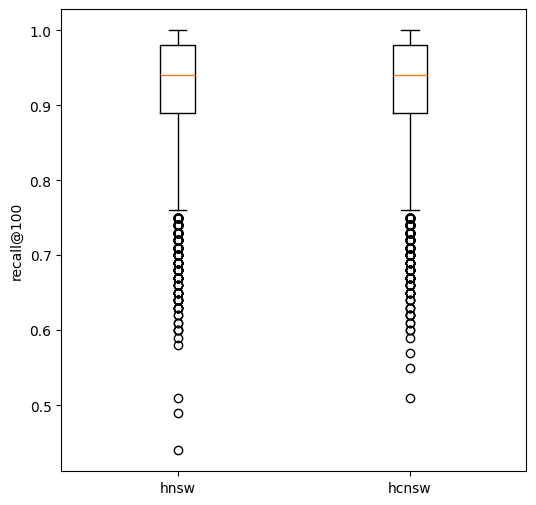

In [7]:
all_recalls = [recalls[method_name] for method_name in METHOD_NAMES]

fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
ax.set_ylabel('recall@100')
bplot = ax.boxplot(all_recalls, labels=METHOD_NAMES)

plt.show()

## Variação de seeds (1 a 30)

In [4]:
SEED_RANGE = range(1, 31)

In [5]:
recalls = {}
deltas = {}
for method_name in METHOD_NAMES:
    for seed in SEED_RANGE:
        recalls[(method_name, seed)] = load(f"data/{method_name}_d0_{DB_NAME}_seed{seed}_recalls.npy")
        deltas[(method_name, seed)] = load(f"data/{method_name}_d0_{DB_NAME}_seed{seed}_deltas.npy")

In [12]:
table = []
for method_name in METHOD_NAMES:
    for seed in SEED_RANGE:
        mean_recalls, s_recalls = get_mean_and_sd(recalls[(method_name, seed)])
        mean_deltas, s_deltas = get_mean_and_sd(deltas[(method_name, seed)])
        table.append((method_name, seed, mean_recalls, s_recalls, mean_deltas, s_deltas, min(recalls[(method_name, seed)])))
table.sort(key=lambda row: row[4], reverse=True)

In [13]:
print(tabulate(table, headers=["method", "seed", "recall@100", "SD", "query time (s)", "SD", "min recall"]))

method      seed    recall@100        SD    query time (s)           SD    min recall
--------  ------  ------------  --------  ----------------  -----------  ------------
hcnsw          4       0.7153   0.163226       0.000859768  0.000146448          0.27
hnsw           4       0.71604  0.162657       0.000854153  0.000200494          0.28
hcnsw          7       0.71488  0.163318       0.000845187  0.000173014          0.27
hnsw           6       0.7166   0.162723       0.000840686  0.000150212          0.27
hnsw           1       0.71581  0.163029       0.000837771  0.000155885          0.27
hnsw           3       0.7158   0.163063       0.00083427   0.000181883          0.25
hnsw           8       0.71641  0.162581       0.000833025  0.00017913           0.27
hnsw           7       0.71562  0.162959       0.000827935  0.000164389          0.27
hnsw           2       0.7165   0.162381       0.000827909  0.000172979          0.26
hnsw           5       0.71536  0.164414       0.00081

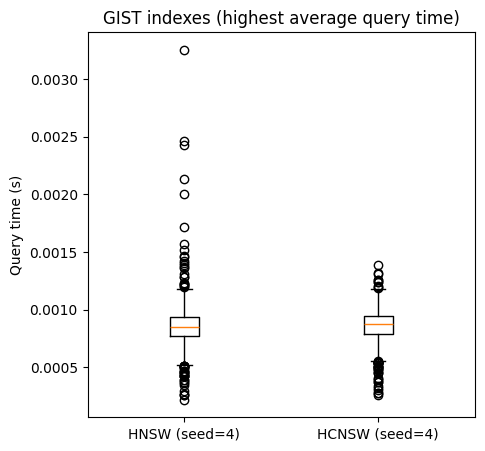

In [23]:
selected_deltas = (deltas[("hnsw", 4)], deltas[("hcnsw", 4)])

fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
ax.set_ylabel('Query time (s)')
bplot = ax.boxplot(selected_deltas, labels=("HNSW (seed=4)", "HCNSW (seed=4)"))
plt.title("GIST indexes (highest average query time)")
plt.savefig('boxplot_gist2.pdf', bbox_inches='tight') 
plt.show()

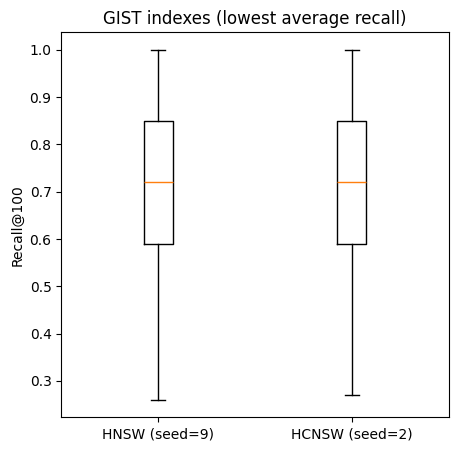

In [24]:
selected_recalls = (recalls[("hnsw", 9)], recalls[("hcnsw", 2)])

fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
ax.set_ylabel('Recall@100')
bplot = ax.boxplot(selected_recalls, labels=("HNSW (seed=9)", "HCNSW (seed=2)"))
plt.title("GIST indexes (lowest average recall)")
plt.savefig('boxplot_gist.pdf', bbox_inches='tight') 
plt.show()

In [9]:
max_deltas_by_method = {}
for method_name in METHOD_NAMES:
    method_deltas = []
    for seed in range(1, 31):
        method_deltas.append(max(deltas[(method_name, seed)])*1000)
    max_deltas_by_method[method_name] = method_deltas

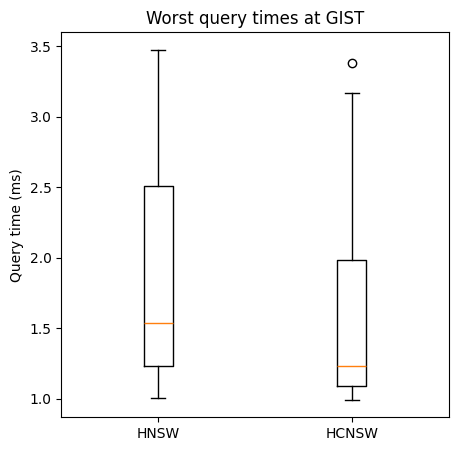

In [13]:
all_deltas = [max_deltas_by_method[method_name] for method_name in METHOD_NAMES]

fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
ax.set_ylabel('Query time (ms)')
bplot = ax.boxplot(all_deltas, labels=[name.upper() for name in METHOD_NAMES])
plt.title("Worst query times at GIST")
plt.savefig('boxplot_gist3.pdf', bbox_inches='tight') 
plt.show()

In [6]:
recalls_by_method = {}
for method_name in METHOD_NAMES:
    method_recalls = []
    for seed in range(1, 31):
        method_recalls += list(deltas[(method_name, seed)])
    recalls_by_method[method_name] = method_recalls

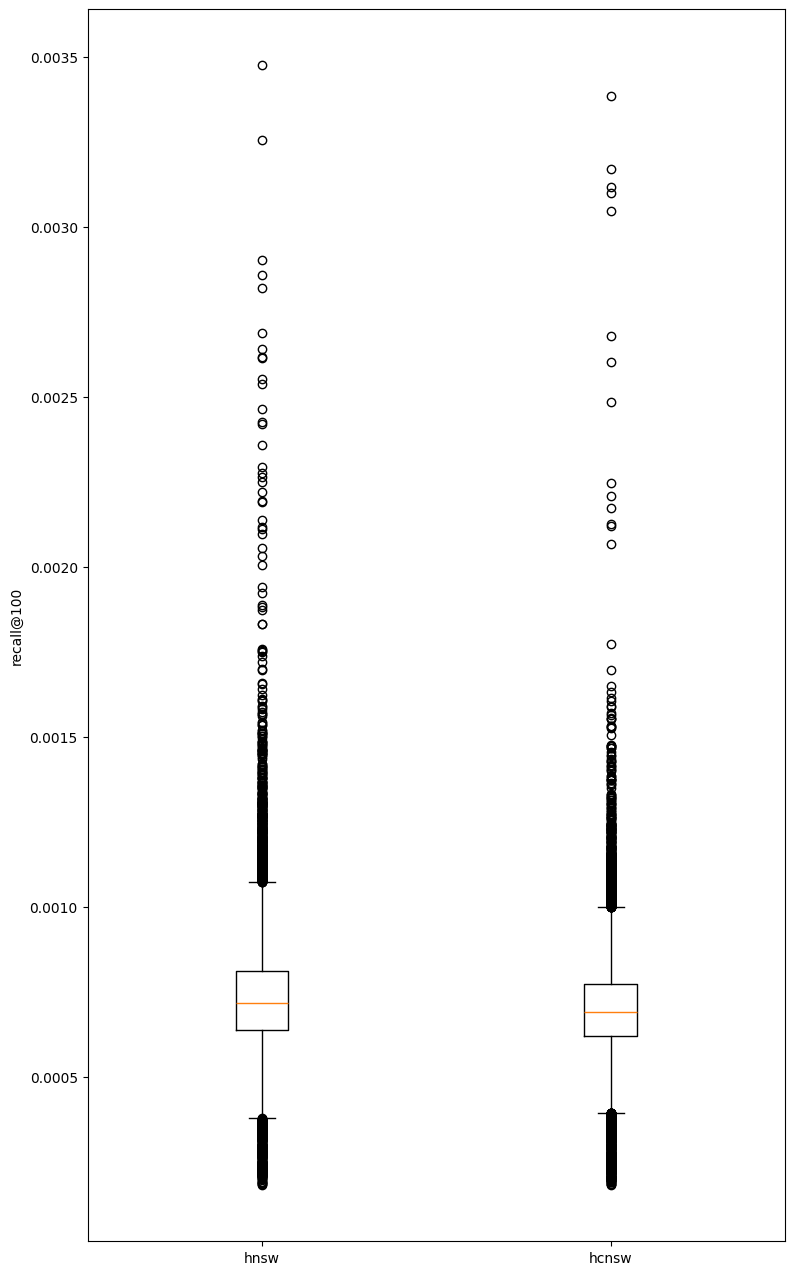

In [9]:
all_recalls = [recalls_by_method[method_name] for method_name in METHOD_NAMES]

fig, ax = plt.subplots()
fig.set_size_inches(9, 16)
ax.set_ylabel('recall@100')
bplot = ax.boxplot(all_recalls, labels=METHOD_NAMES)

plt.show()

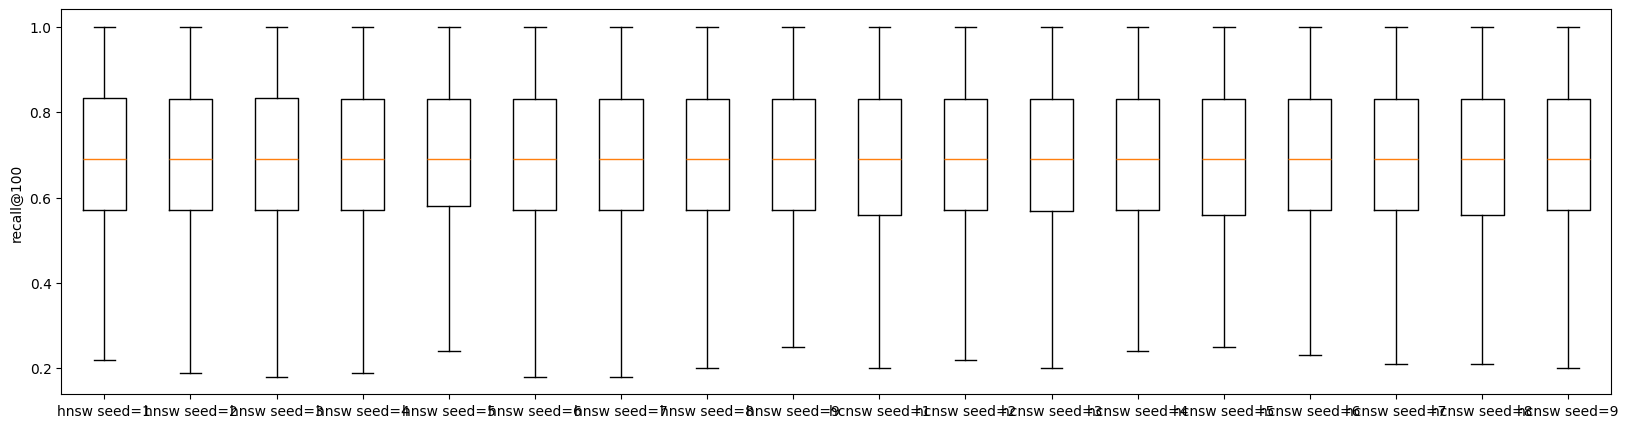

In [25]:
all_recalls = [recalls[(method_name, seed)] for method_name in METHOD_NAMES for seed in SEED_RANGE]

fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
ax.set_ylabel('recall@100')
bplot = ax.boxplot(all_recalls, labels=[f"{method_name} seed={seed}" for method_name in METHOD_NAMES for seed in SEED_RANGE])

plt.show()

In [13]:
table = []
for method_name in METHOD_NAMES:
    method_recalls = []
    method_deltas = []
    for seed in SEED_RANGE:
        mean_recalls, s_recalls = get_mean_and_sd(recalls[(method_name, seed)])
        method_recalls.append(mean_recalls)
        mean_deltas, s_deltas = get_mean_and_sd(deltas[(method_name, seed)])
        method_deltas.append(mean_deltas)
    mean_recalls, s_recalls = get_mean_and_sd(method_recalls)
    mean_deltas, s_deltas = get_mean_and_sd(method_deltas)
    table.append((method_name, mean_recalls, s_recalls, mean_deltas, s_deltas))
table.sort(key=lambda row: row[1], reverse=True)

In [14]:
print(tabulate(table, headers=["method", "recall@100", "SD", "query time (s)", "SD"]))

method      recall@100           SD    query time (s)           SD
--------  ------------  -----------  ----------------  -----------
hnsw          0.71596   0.000439106       0.000729536  7.16411e-05
hcnsw         0.715347  0.000422063       0.000698745  6.0327e-05


In [8]:
table = []
for method_name in METHOD_NAMES:
    method_recalls = []
    method_deltas = []
    for seed in SEED_RANGE:
        method_recalls += list(recalls[(method_name, seed)])
        method_deltas += list(deltas[(method_name, seed)])
    mean_recalls, s_recalls = get_mean_and_sd(method_recalls)
    mean_deltas, s_deltas = get_mean_and_sd(method_deltas)
    table.append((method_name, mean_recalls, s_recalls, mean_deltas, s_deltas))
table.sort(key=lambda row: row[1], reverse=True)

In [9]:
print(tabulate(table, headers=["method", "recall@100", "SD", "query time (s)", "SD"]))

method      recall@100        SD    query time (s)           SD
--------  ------------  --------  ----------------  -----------
hnsw          0.71596   0.162853       0.000729536  0.000167544
hcnsw         0.715347  0.162893       0.000698745  0.000148899


In [10]:
table = []
for method_name in METHOD_NAMES:
    for seed in SEED_RANGE:
        recalls_under_05 = 0
        recalls_under_03 = 0
        mean_recalls, s_recalls = get_mean_and_sd(recalls[(method_name, seed)])
        for recall in recalls[(method_name, seed)]:
            if recall < 0.5:
                recalls_under_05 += 1
                if recall < 0.3:
                    recalls_under_03 += 1
        table.append((method_name, seed, mean_recalls, s_recalls, recalls_under_05, recalls_under_03))
table.sort(key=lambda row: row[2], reverse=True)
table.sort(key=lambda row: row[4])
table.sort(key=lambda row: row[5])

In [11]:
print(tabulate(table, headers=["method", "seed", "recall@100", "SD", "recalls < 0.5", "recalls < 0.3"]))

method      seed    recall@100         SD    recalls < 0.5    recalls < 0.3
--------  ------  ------------  ---------  ---------------  ---------------
hnsw          28      0.925691  0.0684381                0                0
hnsw          16      0.925633  0.0684686                0                0
hnsw          12      0.925596  0.0685545                0                0
hnsw          27      0.925576  0.0685274                0                0
hnsw          10      0.925557  0.0685031                0                0
hcnsw         12      0.925509  0.0686205                0                0
hnsw          24      0.925502  0.0687156                0                0
hcnsw         22      0.925488  0.0686115                0                0
hcnsw         29      0.925482  0.0686929                0                0
hcnsw         27      0.925475  0.0686722                0                0
hcnsw         11      0.925465  0.0687548                0                0
hcnsw       

In [10]:
table = []
for method_name in METHOD_NAMES:
    method_recalls_under_05 = []
    method_recalls_under_03 = []
    for seed in SEED_RANGE:
        recalls_under_05 = 0
        recalls_under_03 = 0
        for recall in recalls[(method_name, seed)]:
            if recall < 0.5:
                recalls_under_05 += 1
                if recall < 0.3:
                    recalls_under_03 += 1
        method_recalls_under_05.append(recalls_under_05)
        method_recalls_under_03.append(recalls_under_03)
    mean_recalls_05, s_recalls_05 = get_mean_and_sd(method_recalls_under_05)
    mean_recalls_03, s_recalls_03 = get_mean_and_sd(method_recalls_under_03)
    table.append((method_name, mean_recalls_05, s_recalls_05, mean_recalls_03, s_recalls_03))
table.sort(key=lambda row: row[1])
table.sort(key=lambda row: row[3])

In [11]:
print(tabulate(table, headers=["method", "recalls < 0.5", "SD", "recalls < 0.3", "SD"]))

method      recalls < 0.5       SD    recalls < 0.3        SD
--------  ---------------  -------  ---------------  --------
hcnsw             106.533  4.1083           1.16667  0.379049
hnsw              106.967  3.15664          1.16667  0.379049


In [12]:
for method_name in METHOD_NAMES:
    for seed in SEED_RANGE:
        for i, delta in enumerate(deltas[(method_name, seed)]):
            if delta < 0.00001:
                print(f"method={method_name} seed={seed} time={delta} recall={recalls[(method_name, seed)][i]}")